In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
#Import financial data

ism = pd.read_csv('ISMPMI.csv', parse_dates=['Date'])
peratio = pd.read_csv('PERatio.csv', parse_dates=['Date'])
treasuryrates = pd.read_csv('TreasuryRates.csv', parse_dates=['Date'])
recession = pd.read_csv('USREC.csv', parse_dates=['Date', 'Start', 'End'])
vix = pd.read_csv('VixData.csv', parse_dates=['Date'])

In [3]:
#Subtract 3 months, 6 months, and 1 year from date column in recession to prep it to test forecasting ability of financial metrics
rec_3 = recession.copy()
rec_3.Date = rec_3.Date.apply(lambda x: x - pd.DateOffset(months=3))

rec_6 = recession.copy()
rec_6.Date = rec_6.Date.apply(lambda x: x - pd.DateOffset(months=6))

rec_12 = recession.copy()
rec_12.Date = rec_12.Date.apply(lambda x: x - pd.DateOffset(months=12))


In [4]:
ism_recession = ism.merge(recession, how = 'outer', on = 'Date')
ism_rec_3 = ism.merge(rec_3, how = 'outer', on = 'Date')
ism_rec_6 = ism.merge(rec_6, how = 'outer', on = 'Date')
ism_rec_12 = ism.merge(rec_12, how = 'outer', on = 'Date')
print(ism_recession.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1420 entries, 0 to 1419
Data columns (total 5 columns):
Date     1420 non-null datetime64[ns]
PMI      843 non-null float64
USREC    1420 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 66.6 KB
None


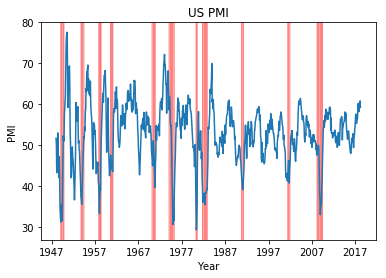

In [5]:
###Plotting linegraph for ISM data to show relationship between that and periods of recession


#Shade in recessions in linegraph
x = ism_recession.Date
y = ism_recession.PMI

plt.plot(x, y)
plt.title('US PMI')
plt.xlabel('Year')
plt.ylabel('PMI')

ism_recession_NaT = ism_recession[~np.isnat(ism_recession.Start)]
ism_recession_NaT = ism_recession_NaT[ism_recession_NaT.Date > datetime.date(1946, 1, 1)]

for index, row in ism_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

    

US PMI Mean During Recessions: 42.594262295081954
US PMI Standard Deviation During Recessions: 6.966610051045805


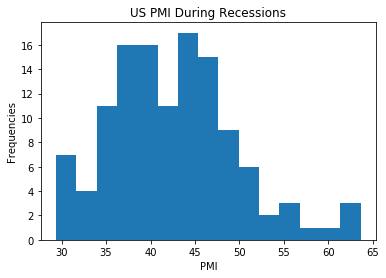

In [6]:
#Histograms of ISM Data during recessions and not during recessions

ism_hist_recession = ism_recession[ism_recession.USREC == 1]
ism_hist_not_recession = ism_recession[ism_recession.USREC == 0]

ism_hist_rec_3 = ism_rec_3[ism_rec_3.USREC == 1]
ism_hist_rec_6 = ism_rec_6[ism_rec_6.USREC == 1]
ism_hist_rec_12 = ism_rec_12[ism_rec_12.USREC == 1]

#Get Integer values for PMI to make histograms, take out NaN values

ism_hist_recession = ism_hist_recession[~np.isnan(ism_hist_recession.PMI)]
ism_hist_not_recession = ism_hist_not_recession[~np.isnan(ism_hist_not_recession.PMI)]

ism_hist_rec_3 = ism_hist_rec_3[~np.isnan(ism_hist_rec_3.PMI)]
ism_hist_rec_6 = ism_hist_rec_6[~np.isnan(ism_hist_rec_6.PMI)]
ism_hist_rec_12 = ism_hist_rec_12[~np.isnan(ism_hist_rec_12.PMI)]

for i in ism_hist_recession.PMI:
    int(i)

for i in ism_hist_not_recession.PMI:
    int(i)


for i in ism_hist_rec_3.PMI:
    int(i)

for i in ism_hist_rec_6.PMI:
    int(i)
    
for i in ism_hist_rec_12.PMI:
    int(i)


plt.hist(ism_hist_recession.PMI, bins = 15)
plt.title('US PMI During Recessions')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean During Recessions: ' + str(np.mean(ism_hist_recession.PMI)))
print('US PMI Standard Deviation During Recessions: ' + str(np.std(ism_hist_recession.PMI)))

US PMI Mean During Non-Recessionary Periods: 54.58238557558941
US PMI Standard Deviation During Non-Recessionary Periods: 5.837119525128642


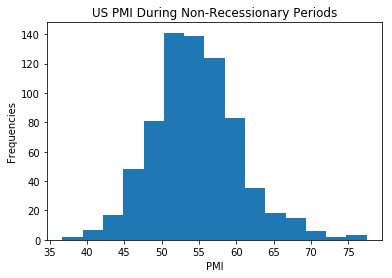

In [7]:
#Histogram for US PMI During Non-Recessionary Periods

plt.hist(ism_hist_not_recession.PMI, bins = 15)
plt.title('US PMI During Non-Recessionary Periods')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean During Non-Recessionary Periods: ' + str(np.mean(ism_hist_not_recession.PMI)))
print('US PMI Standard Deviation During Non-Recessionary Periods: ' + str(np.std(ism_hist_not_recession.PMI)))

US PMI Mean 3 Months before Recession: 44.85245901639342
US PMI Standard Deviation 3 Months Before Recession: 7.5412441152436775


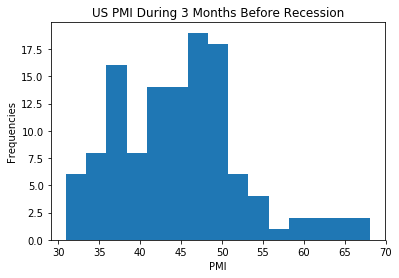

In [8]:
#Histogram for US PMI 3 Months leading up to Recession

plt.hist(ism_hist_rec_3.PMI, bins = 15)
plt.title('US PMI During 3 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 3 Months before Recession: ' + str(np.mean(ism_hist_rec_3.PMI)))
print('US PMI Standard Deviation 3 Months Before Recession: ' + str(np.std(ism_hist_rec_3.PMI)))

US PMI Mean 6 Months before Recession: 47.83852459016392
US PMI Standard Deviation 6 Months Before Recession: 7.335691399927417


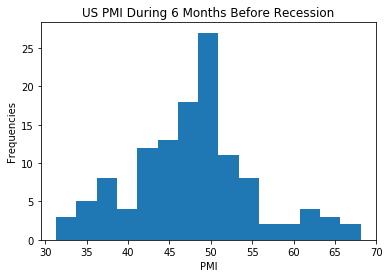

In [9]:
#Histogram for US PMI 6 Months leading up to Recession

plt.hist(ism_hist_rec_6.PMI, bins = 15)
plt.title('US PMI During 6 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 6 Months before Recession: ' + str(np.mean(ism_hist_rec_6.PMI)))
print('US PMI Standard Deviation 6 Months Before Recession: ' + str(np.std(ism_hist_rec_6.PMI)))

US PMI Mean 12 Months before Recession: 53.407438016528914
US PMI Standard Deviation 12 Months Before Recession: 6.645437946618446


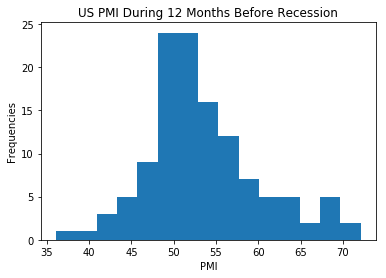

In [10]:
#Histogram for US PMI 12 Months leading up to Recession

plt.hist(ism_hist_rec_12.PMI, bins = 15)
plt.title('US PMI During 12 Months Before Recession')
plt.xlabel('PMI')
plt.ylabel('Frequencies')

print('US PMI Mean 12 Months before Recession: ' + str(np.mean(ism_hist_rec_12.PMI)))
print('US PMI Standard Deviation 12 Months Before Recession: ' + str(np.std(ism_hist_rec_12.PMI)))

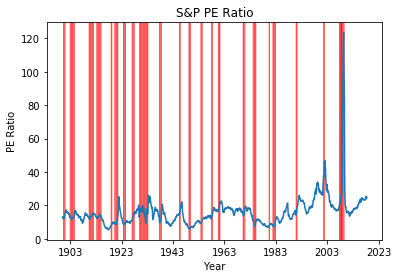

In [11]:
###Plotting linegraph for PE data

#Join PE data and US Recession data

pe_recession = peratio.merge(recession, how = 'outer', on = 'Date')
pe_rec_3 = peratio.merge(rec_3, how = 'outer', on = 'Date')
pe_rec_6 = peratio.merge(rec_6, how = 'outer', on = 'Date')
pe_rec_12 = peratio.merge(rec_12, how = 'outer', on = 'Date')


x_pe = pe_recession.Date
y_pe = pe_recession.PE

plt.plot(x_pe, y_pe)
plt.title('S&P PE Ratio')
plt.xlabel('Year')
plt.ylabel('PE Ratio')

#Shade in recessions in linegraph

pe_recession_NaT = pe_recession[~np.isnat(pe_recession.Start)]
pe_recession_NaT = pe_recession_NaT[pe_recession_NaT.Date > datetime.date(1900, 1, 1)]

for index, row in pe_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average S&P PE Ratio During Recessions: 15.10312312312312
S&P PE Ratio Standard Deviation During Recessions: 13.852808428517779


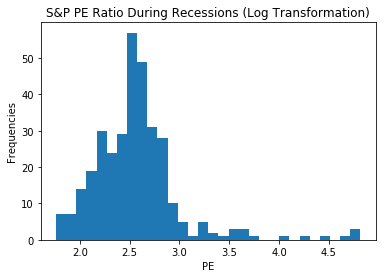

In [12]:
#Histograms of PE Data during recessions and not during recessions

pe_hist_recession = pe_recession[pe_recession.USREC == 1]
pe_hist_not_recession = pe_recession[pe_recession.USREC == 0]

pe_hist_rec_3 = pe_rec_3[pe_rec_3.USREC == 1]
pe_hist_rec_6 = pe_rec_6[pe_rec_6.USREC == 1]
pe_hist_rec_12 = pe_rec_12[pe_rec_12.USREC == 1]

#Get Integer values for PE to make histograms, take out NaN values

pe_hist_recession = pe_hist_recession[~np.isnan(pe_hist_recession.PE)]
pe_hist_not_recession = pe_hist_not_recession[~np.isnan(pe_hist_not_recession.PE)]

pe_hist_rec_3 = pe_hist_rec_3[~np.isnan(pe_hist_rec_3.PE)]
pe_hist_rec_6 = pe_hist_rec_6[~np.isnan(pe_hist_rec_6.PE)]
pe_hist_rec_12 = pe_hist_rec_12[~np.isnan(pe_hist_rec_12.PE)]

for i in pe_hist_recession.PE:
    int(i)

for i in pe_hist_not_recession.PE:
    int(i)


for i in pe_hist_rec_3.PE:
    int(i)

for i in pe_hist_rec_6.PE:
    int(i)
    
for i in pe_hist_rec_12.PE:
    int(i)


plt.hist(np.log(pe_hist_recession.PE), bins = 30)
plt.title('S&P PE Ratio During Recessions (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio During Recessions: ' + str(np.mean(pe_hist_recession.PE)))
print('S&P PE Ratio Standard Deviation During Recessions: ' + str(np.std(pe_hist_recession.PE)))

Average S&P PE Ratio during Non-Recessionary Periods: 16.18758969641218
S&P PE Ratio Standard Deviation during Non-Recessionary Periods: 7.211078610306184


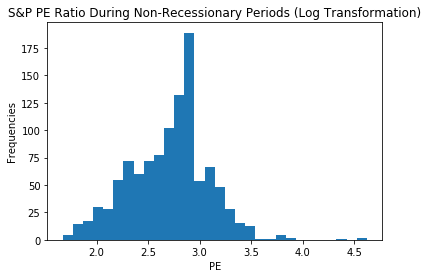

In [32]:
#Histogram of PE Ratios during non-recessionary periods

plt.hist(np.log(pe_hist_not_recession.PE), bins = 30)
plt.title('S&P PE Ratio During Non-Recessionary Periods (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio during Non-Recessionary Periods: ' + str(np.mean(pe_hist_not_recession.PE)))
print('S&P PE Ratio Standard Deviation during Non-Recessionary Periods: ' + str(np.std(pe_hist_not_recession.PE)))

Average S&P PE Ratio 3 Months before Recession: 14.065969696969704
S&P PE Ratio Standard Deviation 3 Months before Recession: 9.172272270552286


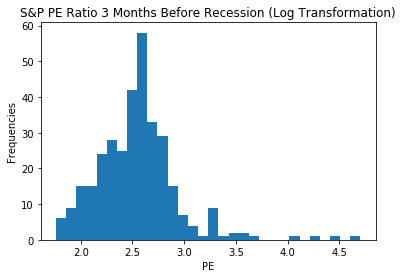

In [13]:
#Histogram of PE Ratios 3 months before recession

plt.hist(np.log(pe_hist_rec_3.PE), bins = 30)
plt.title('S&P PE Ratio 3 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 3 Months before Recession: ' + str(np.mean(pe_hist_rec_3.PE)))
print('S&P PE Ratio Standard Deviation 3 Months before Recession: ' + str(np.std(pe_hist_rec_3.PE)))

Average S&P PE Ratio 6 Months before Recession: 13.586483180428143
S&P PE Ratio Standard Deviation 6 Months before Recession: 5.28079674267858


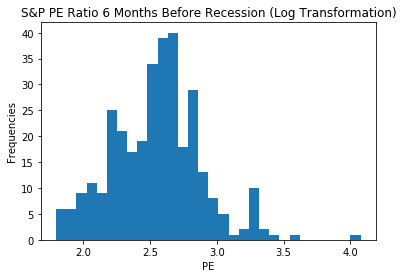

In [14]:
#Histogram of PE Ratios 6 months before recession

plt.hist(np.log(pe_hist_rec_6.PE), bins = 30)
plt.title('S&P PE Ratio 6 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 6 Months before Recession: ' + str(np.mean(pe_hist_rec_6.PE)))
print('S&P PE Ratio Standard Deviation 6 Months before Recession: ' + str(np.std(pe_hist_rec_6.PE)))

Average S&P PE Ratio 12 Months before Recession: 13.945482866043609
S&P PE Ratio Standard Deviation 12 Months before Recession: 4.216936978082644


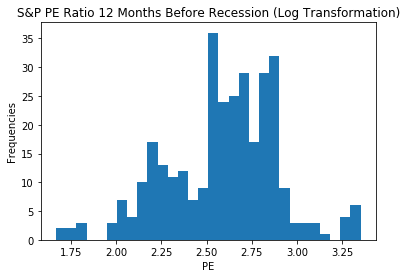

In [15]:
#Histogram of PE Ratios 12 months before recession

plt.hist(np.log(pe_hist_rec_12.PE), bins = 30)
plt.title('S&P PE Ratio 12 Months Before Recession (Log Transformation)')
plt.xlabel('PE')
plt.ylabel('Frequencies')

print('Average S&P PE Ratio 12 Months before Recession: ' + str(np.mean(pe_hist_rec_12.PE)))
print('S&P PE Ratio Standard Deviation 12 Months before Recession: ' + str(np.std(pe_hist_rec_12.PE)))

In [16]:
### Because Treasury and Vix Data have daily entries, we need to interpolate the recession csv file, since it is monthly

series = pd.read_csv('USREC.csv', parse_dates=['Date', 'Start', 'End'], index_col = ['Date'])
recession_resampled = series.resample('D')
recession_interpolated = recession_resampled.interpolate(method = 'linear')


def makezero(i):
    if i == 1:
        return 1
    else:
        return 0


recession_interpolated.USREC = recession_interpolated.USREC.apply(makezero)

recession_interpolated = recession_interpolated.reset_index()

recession.info()
recession_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 4 columns):
Date     1420 non-null datetime64[ns]
USREC    1420 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 44.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43190 entries, 0 to 43189
Data columns (total 4 columns):
Date     43190 non-null datetime64[ns]
USREC    43190 non-null int64
Start    333 non-null datetime64[ns]
End      333 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 1.3 MB


In [17]:
rec_3_interpolated = recession_interpolated.copy()
rec_3_interpolated.Date = rec_3_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=3))

rec_6_interpolated = recession_interpolated.copy()
rec_6_interpolated.Date = rec_6_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=6))

rec_12_interpolated = recession_interpolated.copy()
rec_12_interpolated.Date = rec_12_interpolated.Date.apply(lambda x: x - pd.DateOffset(months=12))

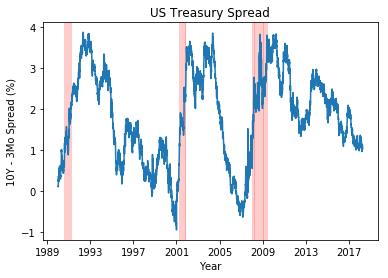

In [18]:
####Plotting linegraph for US Treasury Spread (10 year - 3 month) 

#Join Treasury data and US Recession data
treasuryrates = treasuryrates[['Date', '3_Mo', '10_Yr']]
treasuryrates = treasuryrates.dropna()
treasuryrates['spread'] = treasuryrates['10_Yr'] - treasuryrates['3_Mo']

tr_recession = treasuryrates.merge(recession, how = 'outer', on = 'Date')

tr_recession_interpolated = treasuryrates.merge(recession_interpolated, how = 'outer', on = 'Date')
tr_rec_3_interpolated = treasuryrates.merge(rec_3_interpolated, how = 'outer', on = 'Date')
tr_rec_6_interpolated = treasuryrates.merge(rec_6_interpolated, how = 'outer', on = 'Date')
tr_rec_12_interpolated = treasuryrates.merge(rec_12_interpolated, how = 'outer', on = 'Date')


x_tr = tr_recession.Date
y_tr = tr_recession.spread

plt.plot(x_tr, y_tr)
plt.title('US Treasury Spread')
plt.xlabel('Year')
plt.ylabel('10Y - 3Mo Spread (%)')

#Shade in recessions in linegraph

tr_recession_NaT = tr_recession[~np.isnat(tr_recession.Start)]
tr_recession_NaT = tr_recession_NaT[tr_recession_NaT.Date > datetime.date(1990, 1, 1)]

for index, row in tr_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average US Treasury Spreads During Recessions: 2.003654743390357
US Treasury Spreads Standard Deviation During Recessions: 0.6744528470180484


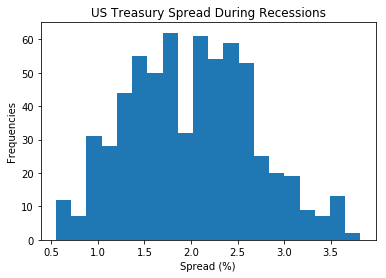

In [19]:
#Histograms of Treasury Spread data during recessions and not during recessions

tr_hist_recession_interpolated = tr_recession_interpolated[tr_recession_interpolated.USREC == 1]
tr_hist_not_recession_interpolated = tr_recession_interpolated[tr_recession_interpolated.USREC == 0]

tr_hist_rec_3_interpolated = tr_rec_3_interpolated[tr_rec_3_interpolated.USREC == 1]
tr_hist_rec_6_interpolated = tr_rec_6_interpolated[tr_rec_6_interpolated.USREC == 1]
tr_hist_rec_12_interpolated = tr_rec_12_interpolated[tr_rec_12_interpolated.USREC == 1]

#Get Integer values for spread to make histograms, take out NaN values

tr_hist_recession_interpolated = tr_hist_recession_interpolated[~np.isnan(tr_hist_recession_interpolated.spread)]
tr_hist_not_recession_interpolated = tr_hist_not_recession_interpolated[~np.isnan(tr_hist_not_recession_interpolated.spread)]

tr_hist_rec_3_interpolated = tr_hist_rec_3_interpolated[~np.isnan(tr_hist_rec_3_interpolated.spread)]
tr_hist_rec_6_interpolated = tr_hist_rec_6_interpolated[~np.isnan(tr_hist_rec_6_interpolated.spread)]
tr_hist_rec_12_interpolated = tr_hist_rec_12_interpolated[~np.isnan(tr_hist_rec_12_interpolated.spread)]


plt.hist(tr_hist_recession_interpolated.spread, bins = 20)
plt.title('US Treasury Spread During Recessions')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads During Recessions: ' + str(np.mean(tr_hist_recession_interpolated.spread)))
print('US Treasury Spreads Standard Deviation During Recessions: ' + str(np.std(tr_hist_recession_interpolated.spread)))

Average US Treasury Spreads, Non-Recessionary Periods: 1.796080049836476
US Treasury Spreads Standard, Non-Recessionary Periods: 1.1472973079077389


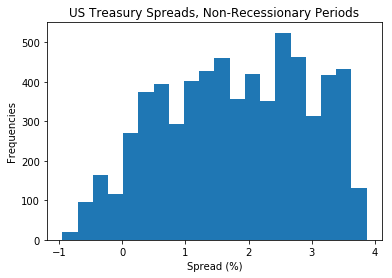

In [33]:
#Histogram of Spreads during non-recessionary periods

plt.hist(tr_hist_not_recession_interpolated.spread, bins = 20)
plt.title('US Treasury Spreads, Non-Recessionary Periods')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads, Non-Recessionary Periods: ' + str(np.mean(tr_hist_not_recession_interpolated.spread)))
print('US Treasury Spreads Standard, Non-Recessionary Periods: ' + str(np.std(tr_hist_not_recession_interpolated.spread)))

Average US Treasury Spreads 3 Months Before Recession: 1.5319844961240303
US Treasury Spreads Standard Deviation 3 Months Before Recession: 0.9004428366560598


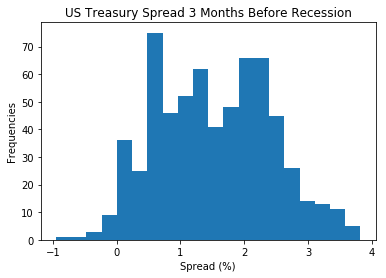

In [20]:
#Histogram of Spreads 3 months before recession

plt.hist(tr_hist_rec_3_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 3 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 3 Months Before Recession: ' + str(np.mean(tr_hist_rec_3_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 3 Months Before Recession: ' + str(np.std(tr_hist_rec_3_interpolated.spread)))

Average US Treasury Spreads 6 Months Before Recession: 1.040353302611366
US Treasury Spreads Standard Deviation 6 Months Before Recession: 1.0822253476675976


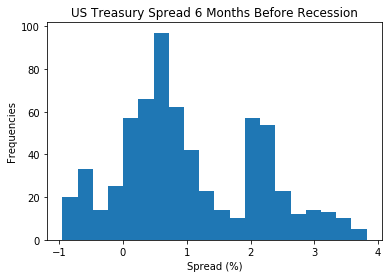

In [22]:
#Histogram of Spreads 6 months before recession

plt.hist(tr_hist_rec_6_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 6 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 6 Months Before Recession: ' + str(np.mean(tr_hist_rec_6_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 6 Months Before Recession: ' + str(np.std(tr_hist_rec_6_interpolated.spread)))

Average US Treasury Spreads 12 Months Before Recession: 0.4229595588235292
US Treasury Spreads Standard Deviation 12 Months Before Recession: 0.8488332553707669


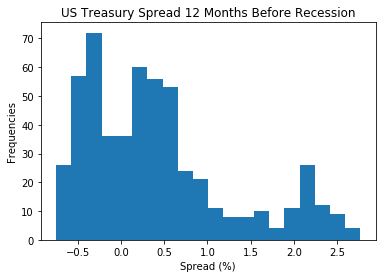

In [23]:
#Histogram of Spreads 12 months before recession

plt.hist(tr_hist_rec_12_interpolated.spread, bins = 20)
plt.title('US Treasury Spread 12 Months Before Recession')
plt.xlabel('Spread (%)')
plt.ylabel('Frequencies')

print('Average US Treasury Spreads 12 Months Before Recession: ' + str(np.mean(tr_hist_rec_12_interpolated.spread)))
print('US Treasury Spreads Standard Deviation 12 Months Before Recession: ' + str(np.std(tr_hist_rec_12_interpolated.spread)))

In [24]:
vix.head()

,Date,VIX
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26


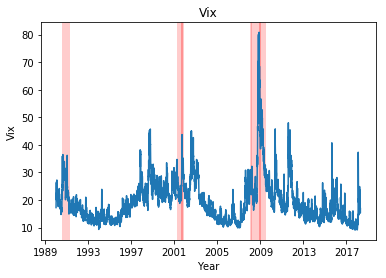

In [30]:
###Plotting linegraph for Vix data

#Join Vix data and US Recession data    
    
vix_recession = vix.merge(recession, how = 'outer', on = 'Date')

vix_recession_interpolated = vix.merge(recession_interpolated, how = 'outer', on = 'Date')
vix_rec_3_interpolated = vix.merge(rec_3_interpolated, how = 'outer', on = 'Date')
vix_rec_6_interpolated = vix.merge(rec_6_interpolated, how = 'outer', on = 'Date')
vix_rec_12_interpolated = vix.merge(rec_12_interpolated, how = 'outer', on = 'Date')


x_vix = vix_recession.Date
y_vix = vix_recession.VIX

plt.plot(x_vix, y_vix)
plt.title('Vix')
plt.xlabel('Year')
plt.ylabel('Vix')

#Shade in recessions in linegraph

vix_recession_NaT = vix_recession[~np.isnat(vix_recession.Start)]
vix_recession_NaT = vix_recession_NaT[vix_recession_NaT.Date > datetime.date(1985, 1, 1)]

for index, row in vix_recession_NaT.iterrows():
    plt.axvspan(row['Start'], row['End'], color='r', alpha=0.2)

Average VIX During Recessions: 31.06446841294295
VIX Standard Deviation During Recessions: 12.179197997181477


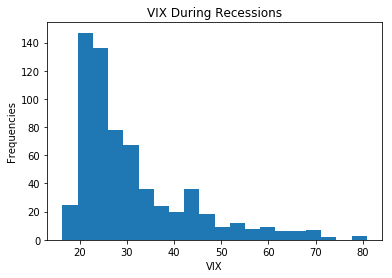

In [26]:
#Histograms of Vix data during recessions and not during recessions

vix_hist_recession_interpolated = vix_recession_interpolated[vix_recession_interpolated.USREC == 1]
vix_hist_not_recession_interpolated = vix_recession_interpolated[vix_recession_interpolated.USREC == 0]

vix_hist_rec_3_interpolated = vix_rec_3_interpolated[vix_rec_3_interpolated.USREC == 1]
vix_hist_rec_6_interpolated = vix_rec_6_interpolated[vix_rec_6_interpolated.USREC == 1]
vix_hist_rec_12_interpolated = vix_rec_12_interpolated[vix_rec_12_interpolated.USREC == 1]

#Get Integer values for spread to make histograms, take out NaN values

vix_hist_recession_interpolated = vix_hist_recession_interpolated[~np.isnan(vix_hist_recession_interpolated.VIX)]
vix_hist_not_recession_interpolated = vix_hist_not_recession_interpolated[~np.isnan(vix_hist_not_recession_interpolated.VIX)]

vix_hist_rec_3_interpolated = vix_hist_rec_3_interpolated[~np.isnan(vix_hist_rec_3_interpolated.VIX)]
vix_hist_rec_6_interpolated = vix_hist_rec_6_interpolated[~np.isnan(vix_hist_rec_6_interpolated.VIX)]
vix_hist_rec_12_interpolated = vix_hist_rec_12_interpolated[~np.isnan(vix_hist_rec_12_interpolated.VIX)]


plt.hist(vix_hist_recession_interpolated.VIX, bins = 20)
plt.title('VIX During Recessions')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX During Recessions: ' + str(np.mean(vix_hist_recession_interpolated.VIX)))
print('VIX Standard Deviation During Recessions: ' + str(np.std(vix_hist_recession_interpolated.VIX)))

Average VIX 3 Months, Non-Recessionary Periods: 18.175115235885567
US Treasury Spreads Standard Deviation, Non-Recessionary Periods: 6.163502433592603


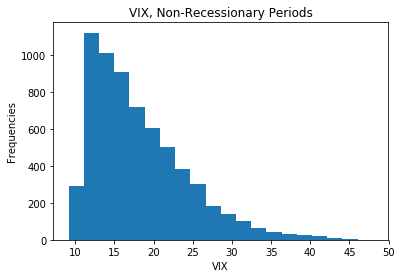

In [37]:
plt.hist(vix_hist_not_recession_interpolated.VIX, bins = 20)
plt.title('VIX, Non-Recessionary Periods')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 3 Months, Non-Recessionary Periods: ' + str(np.mean(vix_hist_not_recession_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation, Non-Recessionary Periods: ' + str(np.std(vix_hist_not_recession_interpolated.VIX)))

Average VIX 3 Months Before Recession: 28.480015290519866
US Treasury Spreads Standard Deviation 3 Months Before Recession: 12.338122388234137


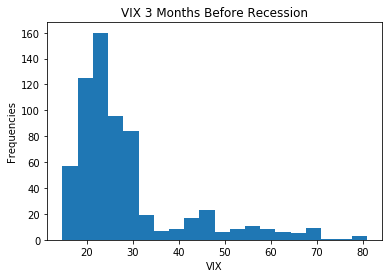

In [36]:
plt.hist(vix_hist_rec_3_interpolated.VIX, bins = 20)
plt.title('VIX 3 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 3 Months Before Recession: ' + str(np.mean(vix_hist_rec_3_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 3 Months Before Recession: ' + str(np.std(vix_hist_rec_3_interpolated.VIX)))

Average VIX 6 Months Before Recession: 25.818475609756067
US Treasury Spreads Standard Deviation 6 Months Before Recession: 10.677618136957017


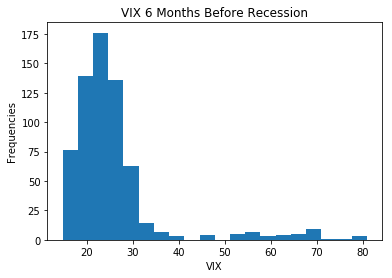

In [28]:
plt.hist(vix_hist_rec_6_interpolated.VIX, bins = 20)
plt.title('VIX 6 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 6 Months Before Recession: ' + str(np.mean(vix_hist_rec_6_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 6 Months Before Recession: ' + str(np.std(vix_hist_rec_6_interpolated.VIX)))

Average VIX 12 Months Before Recession: 20.469871794871807
US Treasury Spreads Standard Deviation 12 Months Before Recession: 5.253600734689889


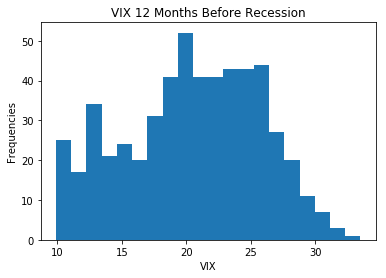

In [29]:
plt.hist(vix_hist_rec_12_interpolated.VIX, bins = 20)
plt.title('VIX 12 Months Before Recession')
plt.xlabel('VIX')
plt.ylabel('Frequencies')

print('Average VIX 12 Months Before Recession: ' + str(np.mean(vix_hist_rec_12_interpolated.VIX)))
print('US Treasury Spreads Standard Deviation 12 Months Before Recession: ' + str(np.std(vix_hist_rec_12_interpolated.VIX)))

In [31]:
#Find start and end dates of all data

#Found from earlier exploration that Treasury Rates and Vix are daily, while ISM, PE Ratio, and Recession are Monthly. We interpolated Recession to Daily

print('Max Date ISM: ' + str(ism.Date.max()) + ', Min Date ISM: ' + str(ism.Date.min()))
print('Max Date PE Ratio: ' + str(peratio.Date.max()) + ', Min Date PE Ratio: ' + str(peratio.Date.min()))
print('Max Date Treasury Rates: ' + str(treasuryrates.Date.max()) + ', Min Date Treasury Rates: ' + str(treasuryrates.Date.min()))
print('Max Date Recession: ' + str(recession.Date.max()) + ', Min Date Recession: ' + str(recession.Date.min()))
print('Max Date Vix: ' + str(vix.Date.max()) + ', Min Date Vix: ' + str(vix.Date.min()))

Max Date ISM: 2018-03-01 00:00:00, Min Date ISM: 1948-01-01 00:00:00
Max Date PE Ratio: 2018-05-14 00:00:00, Min Date PE Ratio: 1900-01-01 00:00:00
Max Date Treasury Rates: 2018-04-19 00:00:00, Min Date Treasury Rates: 1990-01-02 00:00:00
Max Date Recession: 2018-04-01 00:00:00, Min Date Recession: 1900-01-01 00:00:00
Max Date Vix: 2018-04-20 00:00:00, Min Date Vix: 1990-01-02 00:00:00
